# 14. Unsupervised Learning: Clustering | التعلم غير الخاضع للإشراف: التجميع

## 📚 Learning Objectives

By completing this notebook, you will:
- Understand clustering algorithms (K-Means, DBSCAN)
- Apply clustering to unlabeled data
- Evaluate clustering performance
- Visualize clusters and interpret results
- Know when to use clustering

## 🔗 Prerequisites

- ✅ Example 7: Implementing ML Models (need ML knowledge)
- ✅ Example 9: Unsupervised Learning K-Means (clustering basics)
- ✅ Understanding of supervised vs unsupervised learning

---

## Official Structure Reference

This notebook supports **Course 05, Unit 4** requirements from `DETAILED_UNIT_DESCRIPTIONS.md`.

---

## 📚 Prerequisites (What You Need First) | المتطلبات الأساسية

**BEFORE starting this notebook**, you should have completed:
- ✅ **Example 7: Implementing ML Models** - You need ML knowledge!
- ✅ **Example 9: Unsupervised Learning** - Understand clustering basics!
- ✅ **Understanding of data**: What is labeled vs unlabeled data?

**If you haven't completed these**, you might struggle with:
- Understanding clustering concepts
- Knowing when to use clustering
- Evaluating clustering results

---

## 🔗 Where This Notebook Fits | مكان هذا الدفتر

**This is part of Unit 4: Introduction to Machine Learning**

**Why clustering?**
- **After** learning supervised learning, we learn unsupervised
- **Clustering** finds patterns in unlabeled data
- **Essential** for exploratory data analysis

**Builds on**: 
- 📓 Example 7: Implementing ML Models (ML knowledge)
- 📓 Example 9: Unsupervised Learning (clustering basics)

**Leads to**: 
- 📓 Advanced ML topics
- 📓 Real-world applications (customer segmentation, etc.)

**Why this order?**
1. Clustering is essential unsupervised learning technique
2. Many real-world problems need clustering
3. Complements supervised learning knowledge

---

## The Story: Finding Groups Without Labels | القصة: إيجاد المجموعات بدون تسميات

Imagine you have a pile of mixed items (unlabeled data). **Without labels**, you group similar items together - find patterns, discover categories. **After** grouping, you understand the structure!

Same with clustering: **Without labels**, we group similar data points - find patterns, discover segments. **After** clustering, we understand data structure!

---

## Why Clustering Matters | لماذا يهم التجميع

Clustering is essential because:
- **Unlabeled Data**: Many real-world datasets have no labels
- **Pattern Discovery**: Find hidden patterns in data
- **Segmentation**: Group similar items (customers, products)
- **Exploration**: Understand data structure

**Common Student Questions:**
- **Q: When do I use clustering?**
  - Answer: When you have unlabeled data and want to find groups
  - Example: Customer segmentation, anomaly detection
  - Rule: No labels + want groups → clustering
  
- **Q: How do I choose number of clusters?**
  - Answer: Use elbow method, silhouette score, domain knowledge
  - Example: Try k=2,3,4,5 and evaluate
  - Tip: Domain knowledge helps (e.g., "we expect 3 customer segments")

---

## Introduction

**Clustering** is an unsupervised learning technique that groups similar data points together without labels. It's essential for exploratory data analysis and finding patterns in unlabeled data.


# 14. Unsupervised Learning: Clustering | التعلم غير الخاضع للإشراف: التجميع

**All concepts are explained in the code comments below - you can learn everything from this notebook alone!**

---

## 🔗 Beyond Supervised Learning | ما بعد التعلم الخاضع للإشراف

**What if you don't have labels?**
- Supervised learning needs labeled data
- But often we have unlabeled data!
- We need to discover patterns without labels

**This notebook teaches clustering!**
- We'll learn **K-Means** - find groups in data
- We'll learn **DBSCAN** - density-based clustering
- We'll learn **evaluation metrics** - measure cluster quality
- We'll learn **visualization** - see clusters in action

**This unlocks unsupervised learning!**

---

## Learning Objectives | أهداف التعلم
1. Apply K-Means clustering algorithm
2. Use DBSCAN for density-based clustering
3. Evaluate clustering performance
4. Visualize and interpret clusters

In [1]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

print("✅ Libraries imported!")
print("\n📚 This notebook covers:")
print("   - K-Means clustering")
print("   - DBSCAN clustering")
print("   - Cluster evaluation")
print("   - Cluster visualization")

✅ Libraries imported!

📚 This notebook covers:
   - K-Means clustering
   - DBSCAN clustering
   - Cluster evaluation
   - Cluster visualization


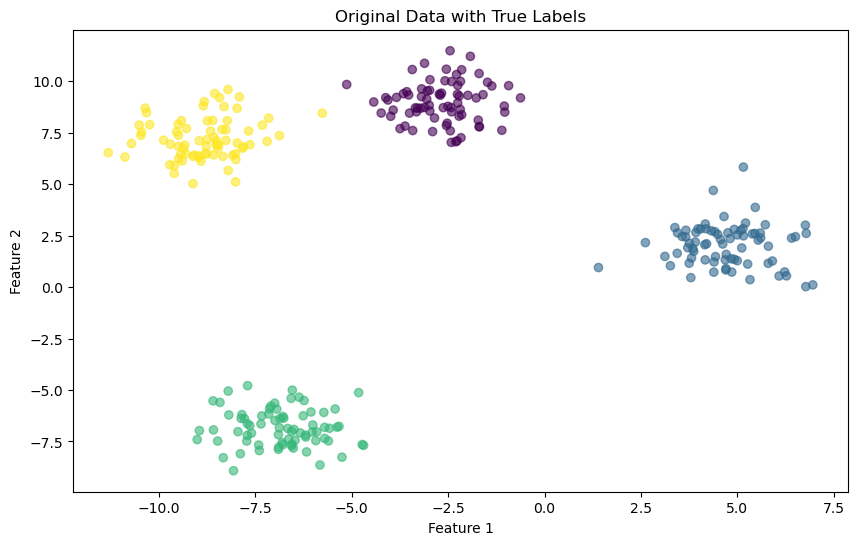


Dataset shape: (300, 2)
Number of true clusters: 4


In [2]:
# Step 2: Create sample data
X, y_true = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42)

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', alpha=0.6)
plt.title('Original Data with True Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
print(f"\nDataset shape: {X.shape}")
print(f"Number of true clusters: {len(np.unique(y_true))}")

1. K-Means Clustering | تجميع K-Means


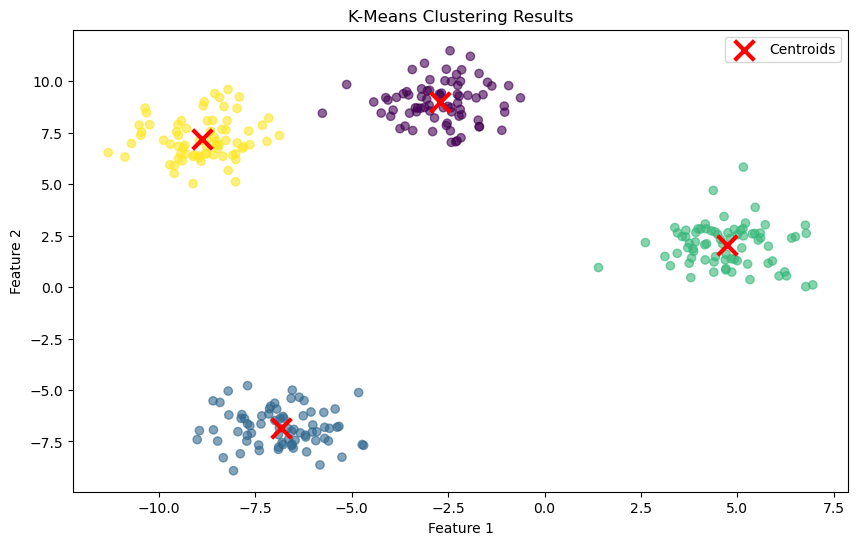


✅ K-Means found 4 clusters
Inertia (within-cluster sum of squares): 564.91


In [3]:
# Step 3: K-Means Clustering
print("=" * 70)
print("1. K-Means Clustering | تجميع K-Means")
print("=" * 70)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
           c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

print(f"\n✅ K-Means found {len(np.unique(y_pred))} clusters")
print(f"Inertia (within-cluster sum of squares): {kmeans.inertia_:.2f}")


2. DBSCAN Clustering | تجميع DBSCAN


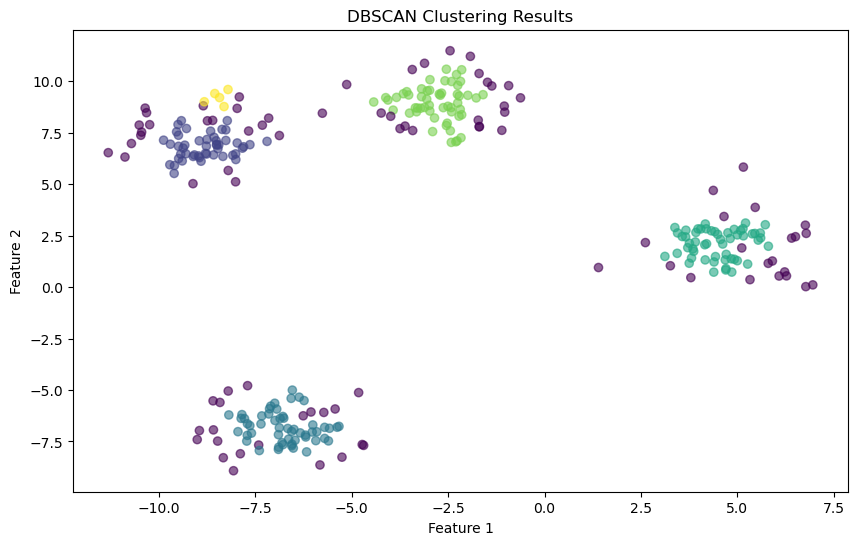


✅ DBSCAN found 5 clusters
Noise points: 85


In [4]:
# Step 4: DBSCAN Clustering
print("\n" + "=" * 70)
print("2. DBSCAN Clustering | تجميع DBSCAN")
print("=" * 70)

dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap='viridis', alpha=0.6)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

n_clusters = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
n_noise = list(y_dbscan).count(-1)
print(f"\n✅ DBSCAN found {n_clusters} clusters")
print(f"Noise points: {n_noise}")